In [21]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [22]:
from keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")


In [23]:
# Limit GPU memory growth
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [24]:
train_dir="D:\\AI Project\\Eye\\data\\train"
test_dir="D:\\AI Project\\Eye\\data\\test"
valid_dir="D:\\AI Project\\Eye\\data\\val"

train_datage=ImageDataGenerator(rescale=1/255)
test_datagn=ImageDataGenerator(rescale=1/255)
valid_datagn=ImageDataGenerator(rescale=1/255)

train_set=train_datage.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

test_set=test_datagn.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

valid_set=valid_datagn.flow_from_directory(
    valid_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

Found 18400 images belonging to 8 classes.
Found 2800 images belonging to 8 classes.
Found 2800 images belonging to 8 classes.


In [25]:
train_set.class_indices

{'AMD': 0,
 'CNV': 1,
 'CSR': 2,
 'DME': 3,
 'DR': 4,
 'DRUSEN': 5,
 'MH': 6,
 'NORMAL': 7}

In [1]:
labels=['Age-related Macular Degeneration','Choroidal Neovascularization','Central Serous Retinopathy','Diabetic Macular Edema','Diabetic Retinopathy','DRUSEN','Macular Hole','NORMAL']
labels

['Age-related Macular Degeneration',
 'Choroidal Neovascularization',
 'Central Serous Retinopathy',
 'Diabetic Macular Edema',
 'Diabetic Retinopathy',
 'DRUSEN',
 'Macular Hole',
 'NORMAL']

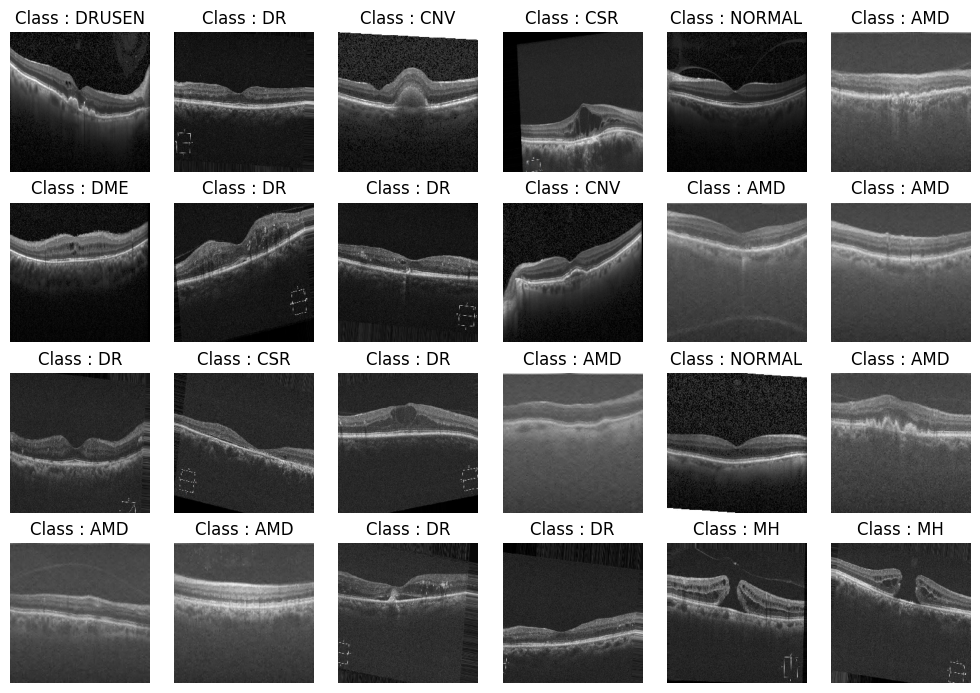

In [27]:
plt.figure(figsize=(10,7))

for i in range(24):
    plt.subplot(4, 6, i+1)
    image,label=train_set.next()
    plt.imshow(image[0])
    plt.axis("off")
    plt.title(f"Class : {labels[np.argmax(label)]}")

plt.tight_layout()
plt.show()

In [28]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(28,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(16,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(500,activation="relu"))
model.add(Dropout(.5))

model.add(Dense(200,activation="relu"))
model.add(Dropout(.2))

model.add(Dense(50,activation="relu"))
model.add(Dropout(.3))

model.add(Dense(8,activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 55, 55, 64)       256       
 hNormalization)                                                 
                                                      

In [29]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [30]:
history=model.fit(train_set,epochs=20,batch_size=32,validation_data=valid_set)

Epoch 1/20
575/575 [==============================] - 60s 101ms/step - loss: 1.2306 - accuracy: 0.4374 - val_loss: 1.1139 - val_accuracy: 0.4893
Epoch 2/20
575/575 [==============================] - 58s 101ms/step - loss: 0.9196 - accuracy: 0.5710 - val_loss: 1.3744 - val_accuracy: 0.4650
Epoch 3/20
575/575 [==============================] - 61s 106ms/step - loss: 0.8207 - accuracy: 0.6366 - val_loss: 1.0018 - val_accuracy: 0.5889
Epoch 4/20
575/575 [==============================] - 57s 99ms/step - loss: 0.7109 - accuracy: 0.6951 - val_loss: 0.6793 - val_accuracy: 0.6946
Epoch 5/20
575/575 [==============================] - 48s 84ms/step - loss: 0.6445 - accuracy: 0.7354 - val_loss: 0.7367 - val_accuracy: 0.7068
Epoch 6/20
575/575 [==============================] - 50s 86ms/step - loss: 0.5792 - accuracy: 0.7696 - val_loss: 0.9880 - val_accuracy: 0.6761
Epoch 7/20
575/575 [==============================] - 48s 83ms/step - loss: 0.5107 - accuracy: 0.8086 - val_loss: 0.4641 - val_accura

In [33]:
test_loss,test_acc=model.evaluate(test_set)

print(f"loss= {test_loss} \n test_accuracy= {test_acc}")

88/88 [==============================] - 8s 87ms/step - loss: 0.3788 - accuracy: 0.9018
loss= 0.37884923815727234 
 test_accuracy= 0.9017857313156128


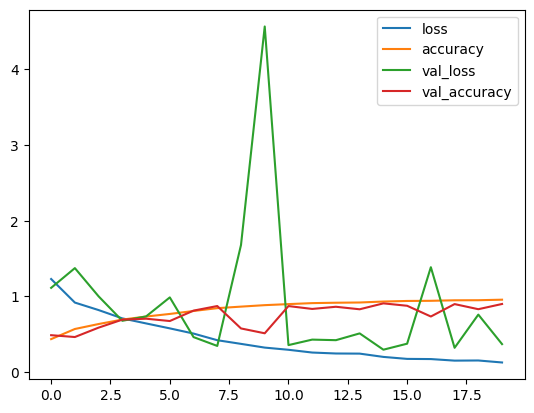

In [34]:
pd.DataFrame(history.history).plot()
plt.show()

In [35]:
model.save("Eye.h5")